# Somministrazione vaccini
Visualizzazione dell'andamento della campagna vaccinale in Italia sulla base dei dati opensource

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
url = (r'https://raw.githubusercontent.com/italia/covid19-opendata-vaccini'+\
       r'/master/dati/somministrazioni-vaccini-summary-latest.csv')
df_vac = pd.read_csv(url, error_bad_lines=False)

In [2]:
df_vac['data'] = pd.to_datetime(df_vac['data_somministrazione'])

## Dosi somministrate cumulate

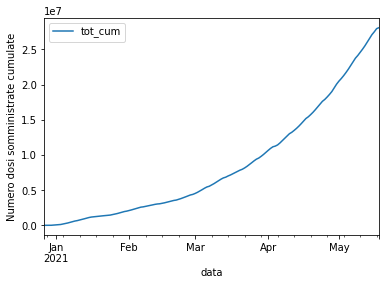

In [3]:
df_vac_by_data = df_vac.groupby('data').sum().reset_index()
df_vac_by_data['tot_cum'] = df_vac_by_data['totale'].cumsum()
df_vac_by_data.plot('data','tot_cum')
_ = plt.ylabel('Numero dosi somministrate cumulate')

## Dosi somministrate cumulate per categoria
Nella categoria altro sono contate tutte le categorie non considerate (in particolar modo gli under 60, per i quali, soprattutto da maggio, le dosi somministrate sono considerevoli)

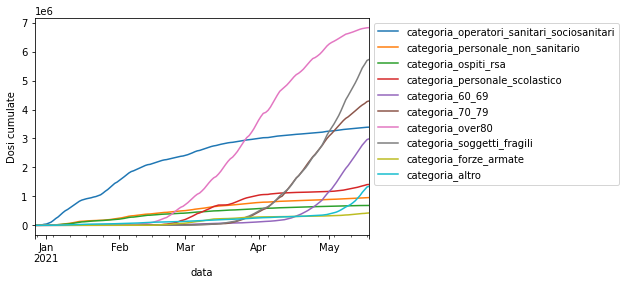

In [4]:
df_vac_cum = df_vac_by_data.set_index('data').cumsum()
df_vac_cum.drop('tot_cum', inplace=True, axis=1)
df_vac_cum[[x for x in df_vac_cum.columns if 'categoria' in x]].reset_index().plot('data')
plt.legend(bbox_to_anchor=(1,1))
_ = plt.ylabel('Dosi cumulate')

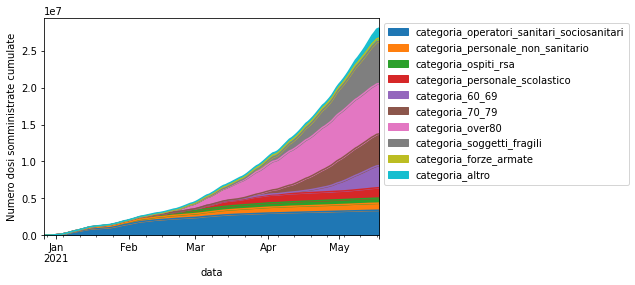

In [5]:
df_vac_cum[[x for x in df_vac_cum.columns if 'categoria' in x]].reset_index().plot.area('data')
plt.ylabel('Numero dosi somministrate cumulate')
plt.legend(bbox_to_anchor=(1,1))

## Ripartizione del numero di dosi per mese

Text(0, 0.5, 'Number of doses')

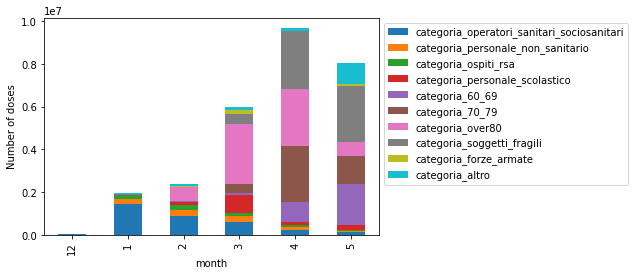

In [6]:
df_vac_month = df_vac.set_index('data').resample('M').sum()
df_vac_month['month'] = df_vac_month.index.month
df_vac_month = df_vac_month.set_index('month')
df_vac_month[[x for x in df_vac_cum.columns if 'categoria' in x]].plot.bar(stacked=True,) #figsize=(10,10))
plt.legend(bbox_to_anchor=(1,1))
plt.ylabel('Number of doses')

## Ripartizione per fasce di età

In [7]:
url = (r'https://raw.githubusercontent.com/italia/covid19-opendata-vaccini'+\
       r'/master/dati/anagrafica-vaccini-summary-latest.csv')
df_anag = pd.read_csv(url, error_bad_lines=False)

In [8]:
df_anag.set_index('fascia_anagrafica')[[x for x in df_vac_cum.columns if 'categoria' in x]]

,categoria_operatori_sanitari_sociosanitari,categoria_personale_non_sanitario,categoria_ospiti_rsa,categoria_personale_scolastico,categoria_60_69,categoria_70_79,categoria_over80,categoria_soggetti_fragili,categoria_forze_armate,categoria_altro
fascia_anagrafica,,,,,,,,,,
16-19,6862,2267,2800,303,0,0,0,56947,685,7150
20-29,507344,91285,18951,102527,0,0,0,272762,39660,75742
30-39,624381,146793,22932,216831,0,0,0,337770,71102,107900
40-49,713396,222404,33166,371298,0,0,0,637922,123414,188024
50-59,859528,299002,49544,472468,0,0,0,1191724,158499,896177
60-69,544998,149482,51040,241443,2991726,0,0,1447087,26715,56456
70-79,116697,31511,86014,5774,0,4298556,0,1498672,4990,12498
80-89,14732,12315,233920,513,0,0,5715242,218910,1902,4890
90+,2569,3237,187242,74,0,0,1112453,71850,333,982


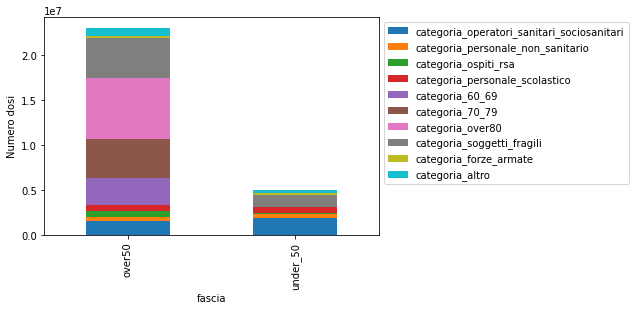

In [9]:
df_anag['low_bound'] = [int(x[:2]) for x in df_anag['fascia_anagrafica']]
df_anag['fascia'] =['under_50' if x<50 else 'over50' for x in df_anag['low_bound']]
df_anag.groupby('fascia')[[x for x in df_vac_cum.columns if 'categoria' in x]].sum().plot.bar(stacked='True')
plt.legend(bbox_to_anchor=(1,1))
_ = plt.ylabel('Numero dosi')